In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'image.interpolation': None})

In [2]:
I = np.asarray(imageio.imread('characterTestPattern688.tif'))

### Lowpass and Highpass Filtering in the Frequency Domain

#### (a) Test Pattern Image and Spectrum:  

(-0.5, 687.5, 687.5, -0.5)

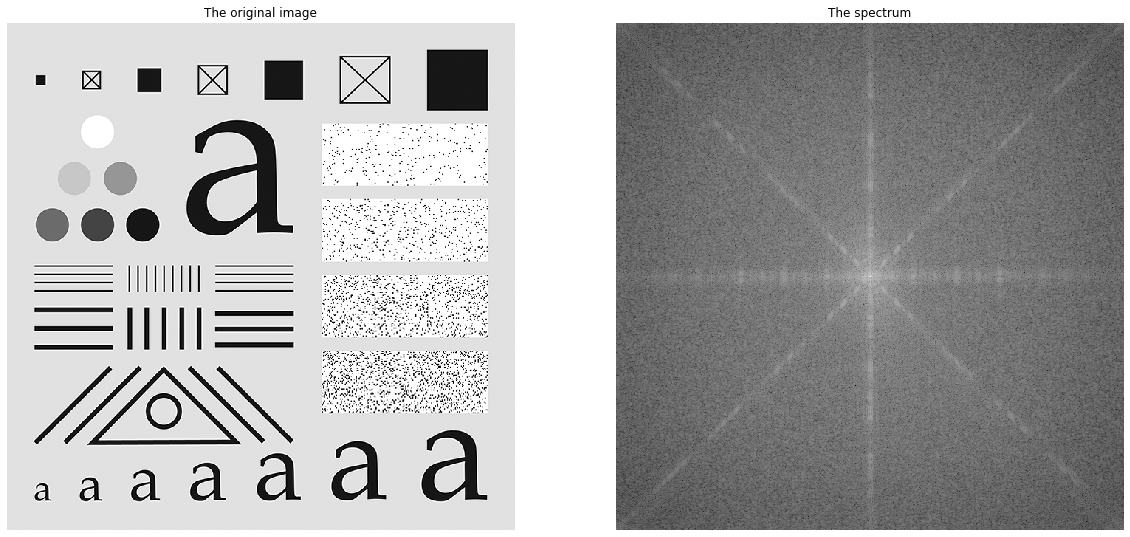

In [3]:
I_f=np.fft.fft2(I)
I_f=np.fft.fftshift(I_f)

plt.figure(figsize=(20,15))
plt.subplot(1,2,1)
plt.imshow(I,cmap='gray')
plt.title('The original image')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(np.log(1+np.abs(I_f)),cmap='gray')
plt.title('The spectrum')
plt.axis('off')

The original text pattern image and its log spectrum are visualized. The component of the spectrum is the amplitude of the sinusoids that combine to form an image. Thus, these lines in the spectrum are representative of the edges of different lines, squares, and rectangles in the original image. The	intensity	of	the	 center	represents	the	 lowest	frequency component and the	frequency increases	outwards.

#### (b) Gaussian Lowpass Filter Function

In [288]:
def gauss_lowpass(P,Q,sigma):
    # Providing a 2 dimentional vectorized representation of the two frequency axes (u and v)
    # The size of filter is (P,Q)
    u, v = np.meshgrid(range(P),range(Q))
    # Compute the distance between each point of (u,v) and the center of filter (P/2,Q/2)
    D = np.sqrt((u-P/2)**2+(v-Q/2)**2)
    # Computing a filter with the guassian transfer function in frequency domain
    H = np.exp(-(D**2)/(2*(sigma**2)))
    return H

The guassian lowpass filter function is calculated. It is needed to provide the matrix with the specific size and calculate the distance of each point in this matrix from the center of this matrix. Then, the value of each point of (u,v) is calculated by the equation for a Gaussian lowpass filter. To avoid the for loop, thee np.meshgrid is used which return 2-dimentional vectorized representation.

#### (c) Lowpass Filtered Images

(-0.5, 687.5, 687.5, -0.5)

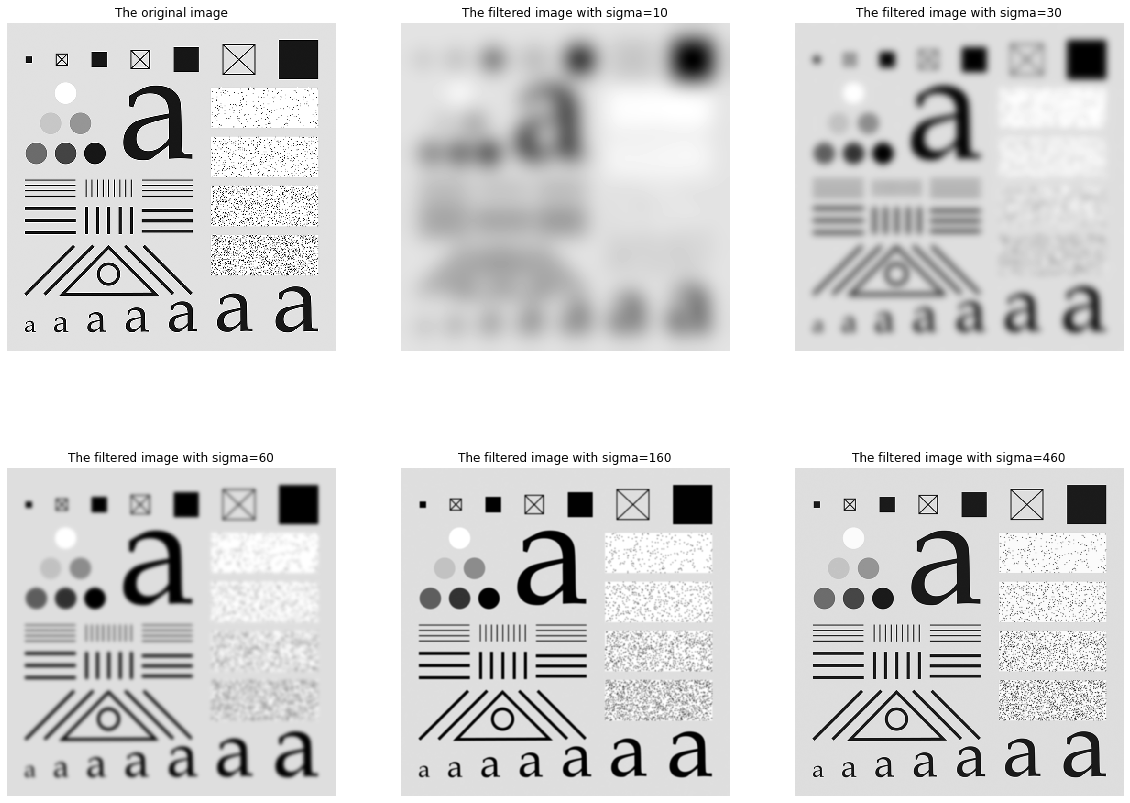

In [6]:
M=I.shape[0]
N=I.shape[1]
P=2*M
Q=2*N
x_center= round((P-M)/2)
y_center= round((Q-N)/2)
Ip=np.pad(I, ((0,P-M),(0,Q-N)), 'reflect')
x, y = np.meshgrid(range(P),range(Q))
Ip=Ip*((-1)**(x+y))
IP=np.fft.fft2(Ip)

plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
plt.imshow(I,cmap='gray')
plt.title('The original image')
plt.axis('off')

plt.subplot(2,3,2)
H10=gauss_lowpass(P,Q,10)
G=np.multiply(IP,H10)
gp=np.fft.ifft2(G)
gp=(np.real(gp))*((-1)**(x+y))
g10=gp[0:M,0:N]
plt.imshow(g10,cmap='gray')
plt.title('The filtered image with sigma=10')
plt.axis('off')

plt.subplot(2,3,3)
H30=gauss_lowpass(P,Q,30)
G=np.multiply(IP,H30)
gp=np.fft.ifft2(G)
gp=(np.real(gp))*((-1)**(x+y))
g30=gp[0:M,0:N]
plt.imshow(g30,cmap='gray')
plt.title('The filtered image with sigma=30')
plt.axis('off')

plt.subplot(2,3,4)
H60=gauss_lowpass(P,Q,60)
G=np.multiply(IP,H60)
gp=np.fft.ifft2(G)
gp=(np.real(gp))*((-1)**(x+y))
g60=gp[0:M,0:N]
plt.imshow(g60,cmap='gray')
plt.title('The filtered image with sigma=60')
plt.axis('off')

plt.subplot(2,3,5)
H160=gauss_lowpass(P,Q,160)
G=np.multiply(IP,H160)
gp=np.fft.ifft2(G)
gp=(np.real(gp))*((-1)**(x+y))
g160=gp[0:M,0:N]
plt.imshow(g160,cmap='gray')
plt.title('The filtered image with sigma=160')
plt.axis('off')

plt.subplot(2,3,6)
H460=gauss_lowpass(P,Q,460)
G=np.multiply(IP,H460)
gp=np.fft.ifft2(G)
gp=(np.real(gp))*((-1)**(x+y))
g460=gp[0:M,0:N]
plt.imshow(g460,cmap='gray')
plt.title('The filtered image with sigma=460')
plt.axis('off')

The figures show the filtered image of the text pattern using a gaussian lowpass filter with different sigma. The cutoff frequency or sigma value is the reason for the difference in their appearance. Here, it is shown that by increasing the cutoff frequency, the obtained image has a better appearance and it has a clean form. Both filter images with sigma 160 and 460 have the same appearance as the original image. In the filtered image with sigma 10, 30 and 60, which are blurred, there is no ringing behavior. Also, the mirror padding is used to avoid black borders characteristic of zero padding.

#### (d) Lowpass Filter Responses

(-0.5, 687.5, 687.5, -0.5)

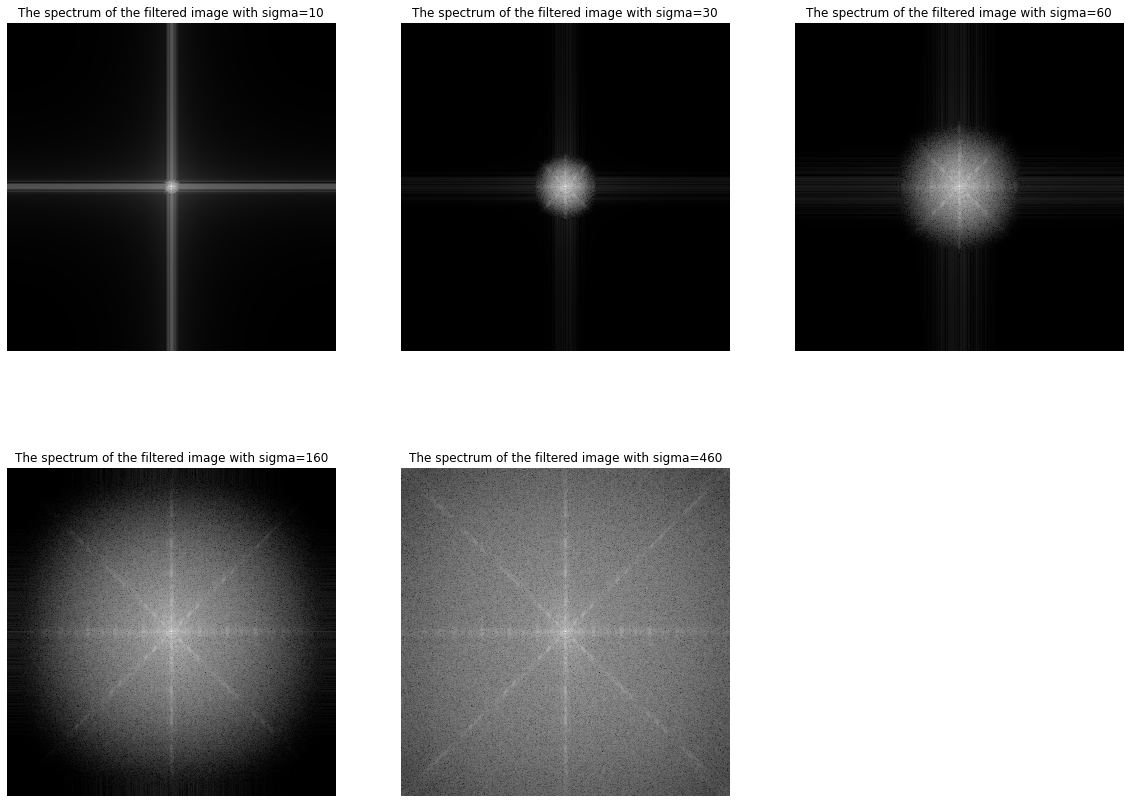

In [7]:
plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
g10_f=np.fft.fft2(g10)
g10_f=np.fft.fftshift(g10_f)
plt.imshow(np.log(1+np.abs(g10_f)),cmap='gray')
plt.title('The spectrum of the filtered image with sigma=10')
plt.axis('off')

plt.subplot(2,3,2)
g30_f=np.fft.fft2(g30)
g30_f=np.fft.fftshift(g30_f)
plt.imshow(np.log(1+np.abs(g30_f)),cmap='gray')
plt.title('The spectrum of the filtered image with sigma=30')
plt.axis('off')

plt.subplot(2,3,3)
g60_f=np.fft.fft2(g60)
g60_f=np.fft.fftshift(g60_f)
plt.imshow(np.log(1+np.abs(g60_f)),cmap='gray')
plt.title('The spectrum of the filtered image with sigma=60')
plt.axis('off')

plt.subplot(2,3,4)
g160_f=np.fft.fft2(g160)
g160_f=np.fft.fftshift(g160_f)
plt.imshow(np.log(1+np.abs(g160_f)),cmap='gray')
plt.title('The spectrum of the filtered image with sigma=160')
plt.axis('off')

plt.subplot(2,3,5)
g460_f=np.fft.fft2(g460)
g460_f=np.fft.fftshift(g460_f)
plt.imshow(np.log(1+np.abs(g460_f)),cmap='gray')
plt.title('The spectrum of the filtered image with sigma=460')
plt.axis('off')

These imagase illustrated the log amplitude of the filtered image with different cutoff frequency.

#### (e) Highpass Filtered Images:

(-0.5, 687.5, 687.5, -0.5)

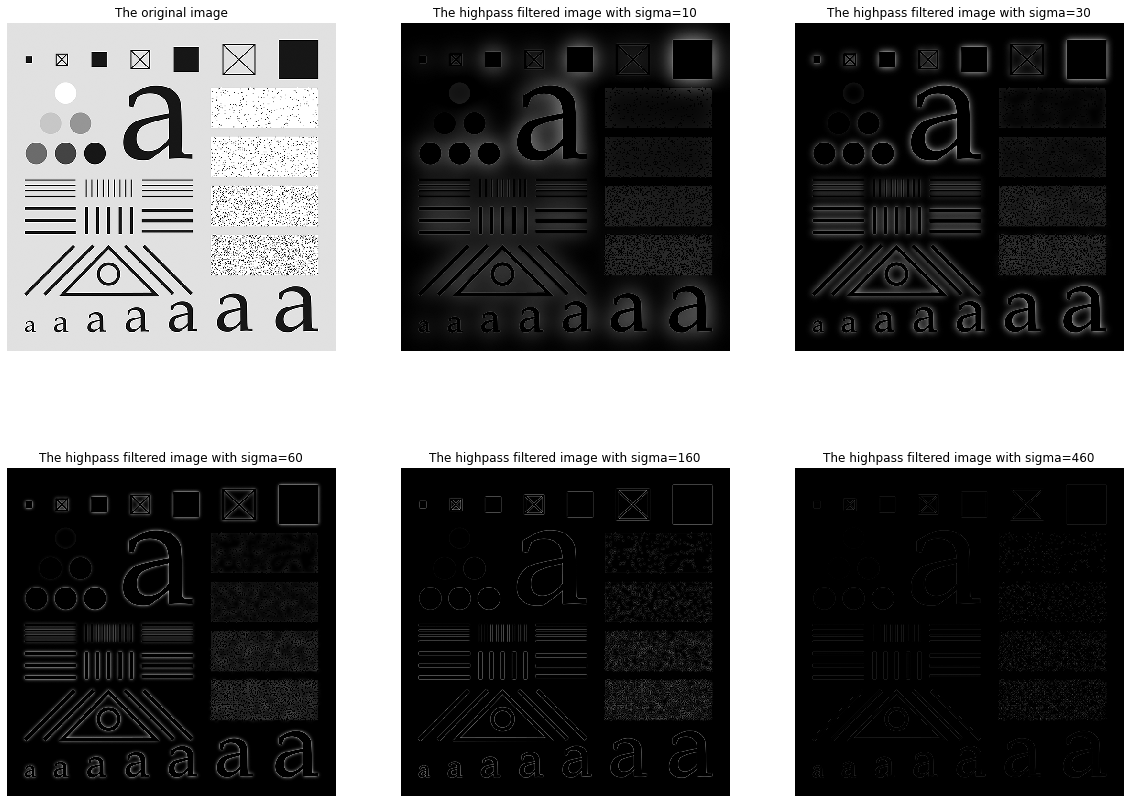

In [10]:
M=I.shape[0]
N=I.shape[1]
P=2*M
Q=2*N
x_center= round((P-M)/2)
y_center= round((Q-N)/2)
Ip=np.pad(I, ((0,P-M),(0,Q-N)), 'reflect')
x, y = np.meshgrid(range(P),range(Q))
Ip=Ip*((-1)**(x+y))
IP=np.fft.fft2(Ip)

plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
plt.imshow(I,cmap='gray', vmin=0, vmax=255)
plt.title('The original image')
plt.axis('off')

plt.subplot(2,3,2)
H10=gauss_lowpass(P,Q,10)
G=np.multiply(IP,1-H10)
gp=np.fft.ifft2(G)
gp=(np.real(gp))*((-1)**(x+y))
g10=gp[0:M,0:N]
plt.imshow(g10,cmap='gray', vmin=0, vmax=255)
plt.title('The highpass filtered image with sigma=10')
plt.axis('off')

plt.subplot(2,3,3)
H30=gauss_lowpass(P,Q,30)
G=np.multiply(IP,1-H30)
gp=np.fft.ifft2(G)
gp=(np.real(gp))*((-1)**(x+y))
g30=gp[0:M,0:N]
plt.imshow(g30,cmap='gray', vmin=0, vmax=255)
plt.title('The highpass filtered image with sigma=30')
plt.axis('off')

plt.subplot(2,3,4)
H60=gauss_lowpass(P,Q,60)
G=np.multiply(IP,1-H60)
gp=np.fft.ifft2(G)
gp=(np.real(gp))*((-1)**(x+y))
g60=gp[0:M,0:N]
plt.imshow(g60,cmap='gray', vmin=0, vmax=255)
plt.title('The highpass filtered image with sigma=60')
plt.axis('off')

plt.subplot(2,3,5)
H160=gauss_lowpass(P,Q,160)
G=np.multiply(IP,1-H160)
gp=np.fft.ifft2(G)
gp=(np.real(gp))*((-1)**(x+y))
g160=gp[0:M,0:N]
plt.imshow(g160,cmap='gray', vmin=0, vmax=255)
plt.title('The highpass filtered image with sigma=160')
plt.axis('off')

plt.subplot(2,3,6)
H460=gauss_lowpass(P,Q,460)
G=np.multiply(IP,1-H460)
gp=np.fft.ifft2(G)
gp=(np.real(gp))*((-1)**(x+y))
g460=gp[0:M,0:N]
plt.imshow(g460,cmap='gray', vmin=0, vmax=255)
plt.title('The highpass filtered image with sigma=460')
plt.axis('off')

The first image is the original image and the others are the filtered image with a gaussian highpass filter. These images are filtered with different sigmas or cutoff frequencies. As shown, by increasing the cutoff frequency, the details in the image become indistinguishable. The filtered image with sigma 460 is relatively black. This pattern is inverse to the pattern of the gaussian lowpass filter in the part (c). Although, in the filtered image with sigma 10, there are white rings around some details of the image which decreases with rising the sigma. 

#### (f) Highpass Filter Responses:

(-0.5, 687.5, 687.5, -0.5)

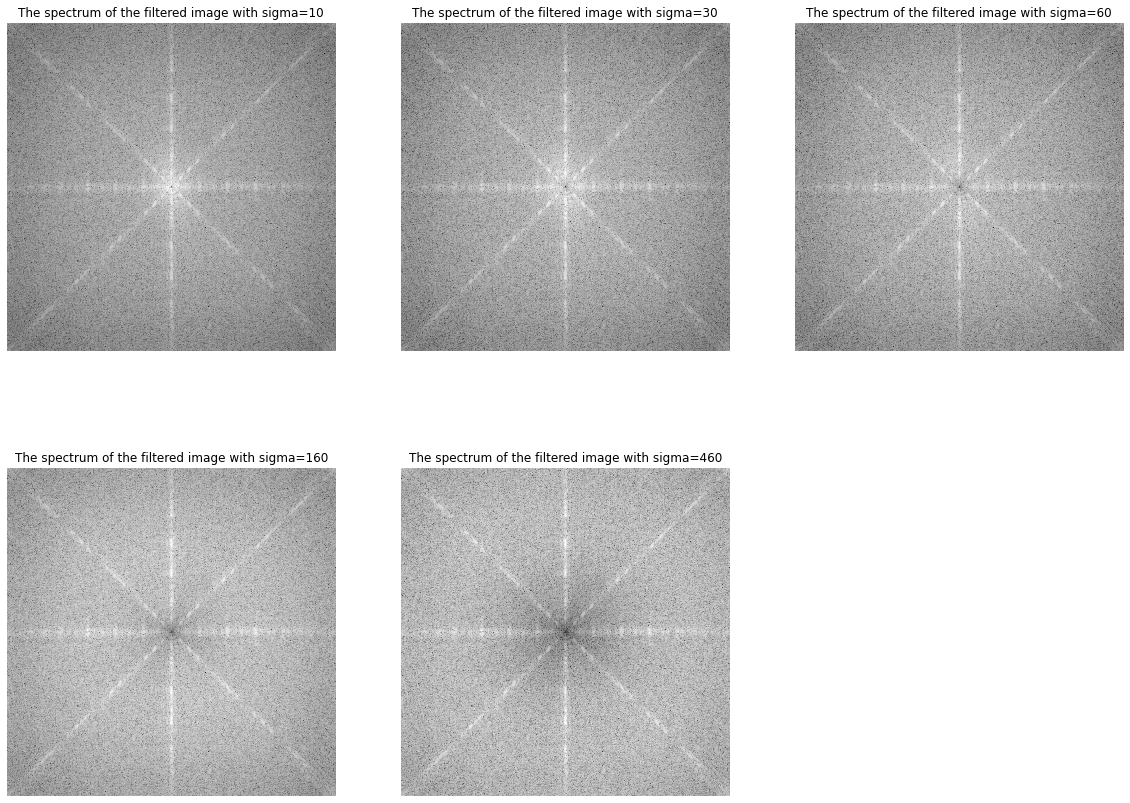

In [11]:
plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
g10_f=np.fft.fft2(g10)
g10_f=np.fft.fftshift(g10_f)
plt.imshow(np.log(1+np.abs(g10_f)),cmap='gray')
plt.title('The spectrum of the filtered image with sigma=10')
plt.axis('off')

plt.subplot(2,3,2)
g30_f=np.fft.fft2(g30)
g30_f=np.fft.fftshift(g30_f)
plt.imshow(np.log(1+np.abs(g30_f)),cmap='gray')
plt.title('The spectrum of the filtered image with sigma=30')
plt.axis('off')

plt.subplot(2,3,3)
g60_f=np.fft.fft2(g60)
g60_f=np.fft.fftshift(g60_f)
plt.imshow(np.log(1+np.abs(g60_f)),cmap='gray')
plt.title('The spectrum of the filtered image with sigma=60')
plt.axis('off')

plt.subplot(2,3,4)
g160_f=np.fft.fft2(g160)
g160_f=np.fft.fftshift(g160_f)
plt.imshow(np.log(1+np.abs(g160_f)),cmap='gray')
plt.title('The spectrum of the filtered image with sigma=160')
plt.axis('off')

plt.subplot(2,3,5)
g460_f=np.fft.fft2(g460)
g460_f=np.fft.fftshift(g460_f)
plt.imshow(np.log(1+np.abs(g460_f)),cmap='gray')
plt.title('The spectrum of the filtered image with sigma=460')
plt.axis('off')

### Notch Filtering to Remove Periodic Interference

In [2]:
I2 = np.asarray(imageio.imread('suaturn-rings-sinusoidal-interf.tif'))

#### (a) Ideal Notch Filter:

In [12]:
def notch(P,Q):
    H = np.ones((P,Q))
    H[0:634,668:680]=0
    H[714:1348,668:680]=0
    return H

(-0.5, 673.5, 673.5, -0.5)

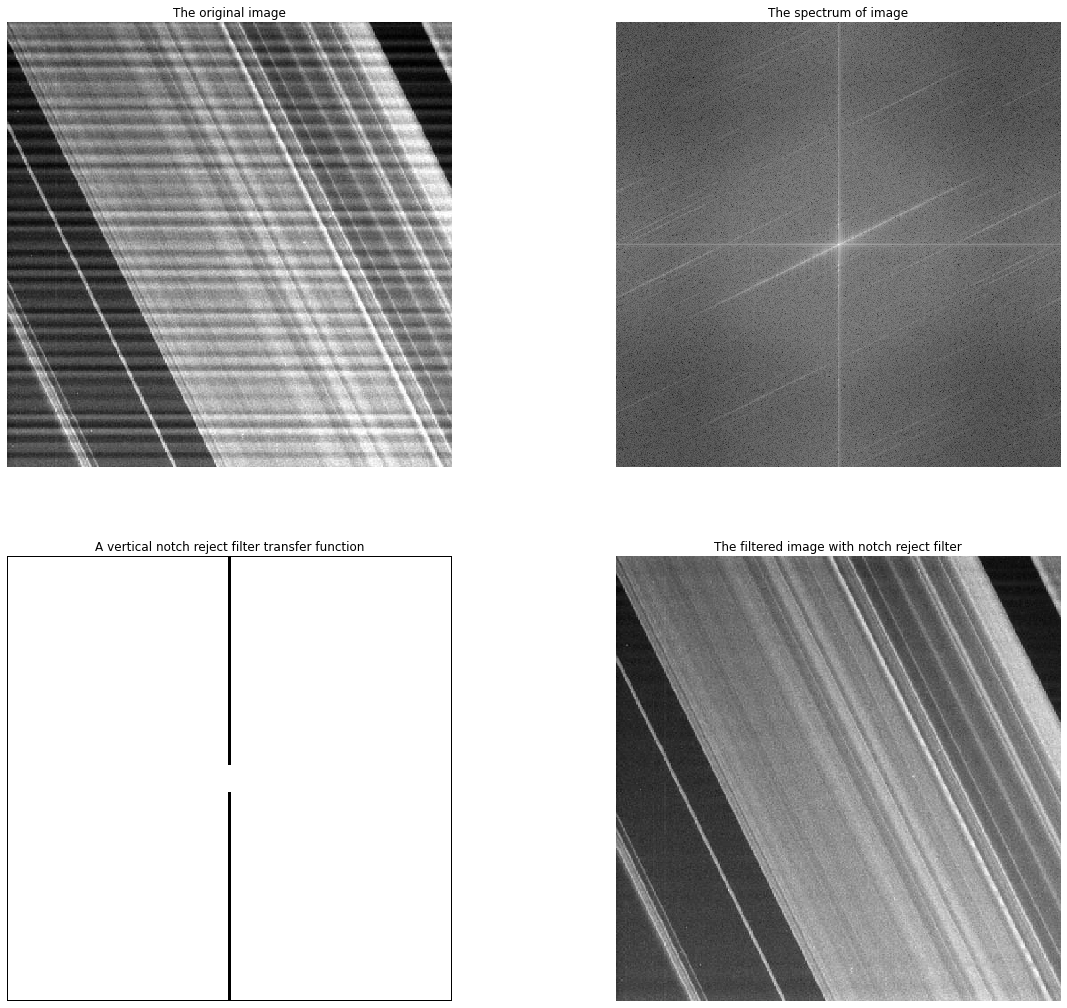

In [13]:
M=I2.shape[0]
N=I2.shape[1]
P=2*M
Q=2*N
x_center= round((P-M)/2)
y_center= round((Q-N)/2)
Ip=np.pad(I2, ((0,P-M),(0,Q-N)), 'reflect')
x, y = np.meshgrid(range(P),range(Q))
Ip=Ip*((-1)**(x+y))
IP=np.fft.fft2(Ip)

plt.figure(figsize=(20,18))

plt.subplot(2,2,1)
plt.imshow(I2 ,cmap='gray')
plt.title('The original image')
plt.axis('off')


plt.subplot(2,2,2)
If=np.fft.fft2(I2)
If=np.fft.fftshift(If)
plt.imshow(np.log(1+np.abs(If)),cmap='gray')
plt.title('The spectrum of image')
plt.axis('off')

H=notch(P,Q)
G=np.multiply(IP,H)
gp=np.fft.ifft2(G)
gp=(np.real(gp))*((-1)**(x+y))
g=gp[0:M,0:N]

from matplotlib.patches import Rectangle
x=plt.subplot(2,2,3)
plt.imshow(H,cmap='gray')
x.add_patch(Rectangle((0,0), P, Q, edgecolor='black',facecolor='none',lw=2))
plt.title('A vertical notch reject filter transfer function')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(g,cmap='gray')
plt.title('The filtered image with notch reject filter')
plt.axis('off')



The ideal notch filter is a 2-dimensional matrix, which is symmetric about the origin. For defining this vertical notch reject filter, the 2D matrix with the specific size is defined. All the elements have the value of one and then the defined areas that should be zero in order to make the vertical axis in the filter. The different width for this axis is chosen to find the best filter to improve the appearance of the corrupted image. Here, the mirror padding is used for replicating the image in the textbook. The visualization shows the original image, its spectrum, the transfer function of the vertical notch filter transfer function and the filtered image with this filter. The resulting image illustrated that this filter can enhance the image and it can remove the sinusoidal pattern which is visible in the original image. The obtained image does not have any residual interference structure.

In [33]:
h=np.fft.ifft2(H)
hi=np.imag(h)
np.where(hi==np.max(hi))

(array([0], dtype=int64), array([730], dtype=int64))

There are two max values for the imaginary component of IDFT of H, so it is verified the symmetry of the notch filter.

(-0.5, 673.5, 673.5, -0.5)

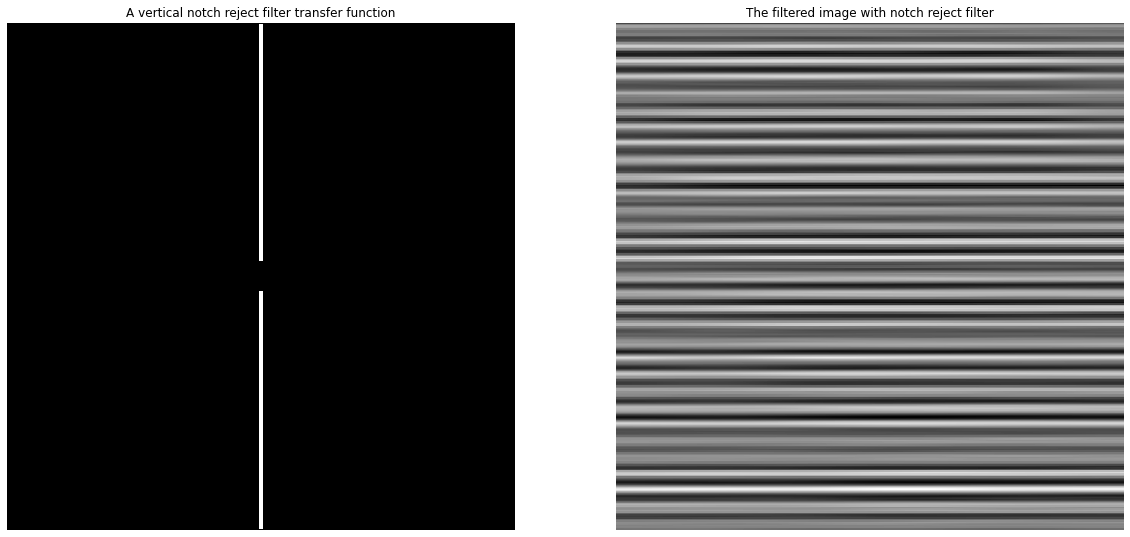

In [10]:
plt.figure(figsize=(20,18))

G=np.multiply(IP,1-H)
gp=np.fft.ifft2(G)
x, y = np.meshgrid(range(P),range(Q))
gp=(np.real(gp))*((-1)**(x+y))
g=gp[0:M,0:N]

from matplotlib.patches import Rectangle
x=plt.subplot(1,2,1)
plt.imshow(1-H,cmap='gray')
x.add_patch(Rectangle((0,0), P, Q, edgecolor='black',facecolor='none',lw=2))
plt.title('A vertical notch reject filter transfer function')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(g.astype(float),cmap='gray')
plt.title('The filtered image with notch reject filter')
plt.axis('off')


This visualization shows the transfer function of the notch pass filter function and the filtered image with this filter. The obtained image with the notch pass filter is the spatial interference pattern.

#### (b) Lowpass Filter:

(-0.5, 673.5, 673.5, -0.5)

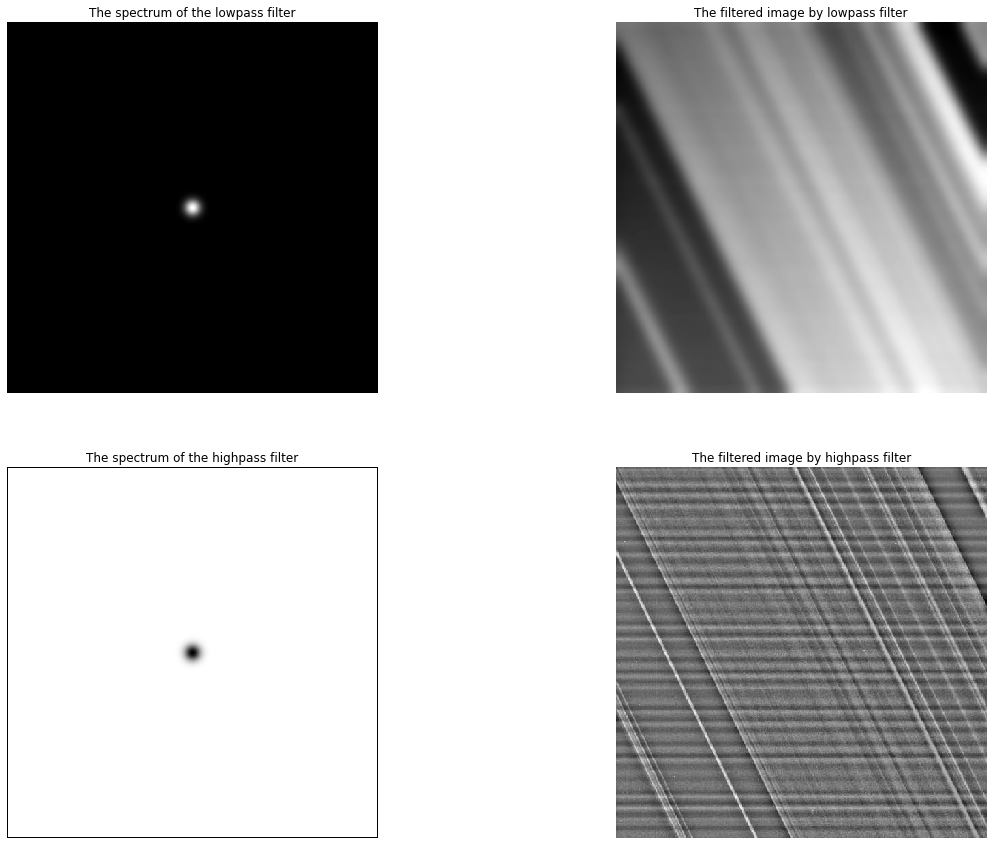

In [298]:
M=I2.shape[0]
N=I2.shape[1]
P=2*M
Q=2*N
x_center= round((P-M)/2)
y_center= round((Q-N)/2)
Ip=np.pad(I2, ((0,P-M),(0,Q-N)), 'reflect')
x, y = np.meshgrid(range(P),range(Q))
Ip=Ip*((-1)**(x+y))
IP=np.fft.fft2(Ip)

plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
H=gauss_lowpass(P,Q,20)
G=np.multiply(IP,H)
gp=np.fft.ifft2(G)
gp=(np.real(gp))*((-1)**(x+y))
gl=gp[0:M,0:N]
plt.imshow(np.abs(H),cmap='gray')
plt.title('The spectrum of the lowpass filter')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(gl,cmap='gray')
plt.title('The filtered image by lowpass filter')
plt.axis('off')


G=np.multiply(IP,1-H)
gp=np.fft.ifft2(G)
gp=(np.real(gp))*((-1)**(x+y))
gh=gp[0:M,0:N]
x=plt.subplot(2,2,3)
plt.imshow(np.abs(1-H),cmap='gray')
x.add_patch(Rectangle((0,0), P, Q, edgecolor='black',facecolor='none',lw=2))
plt.title('The spectrum of the highpass filter')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(gh,cmap='gray')
plt.title('The filtered image by highpass filter')
plt.axis('off')

Here, the lowpass and highpass filter is used to remove the undesirable components of the original image. The value of sigma that can omit these undesirable components for lowpass filter is 20. It is the max value of sigma that can remove this undesirable pattern but at the cost of blurring the image. The filtered image with a lowpass filter does not have any residual interference structure. In the filtered image with the same highpass filter, there is a residual image structure. 
The filtered image with a notch reject filter has a better performance to remove the undesirable components of the original image compared to the lowpass filter. It enhanced the image without blurring. The obtained image with the notch pass filter is the spatial interference pattern but the filtered image with the high pass filter is the combination of the original image and spatial interference pattern. As the notch filter is a selective filter, it can seperate the original image and the interference pattern with the help of passing and rejecting frequencies in a predefined neighborhood of the frequency rectangle. 

### Notch Filtering to Remove Moiré Patterns

In [55]:
def gauss_lowpass2(P,Q,sigma,uk,vk):
    H = np.zeros((P,Q))
    u, v = np.meshgrid(range(P),range(Q), indexing='ij')
    Dk = np.sqrt((u-P/2-uk)**2+(v-Q/2-vk)**2)
    D_k = np.sqrt((u-P/2+uk)**2+(v-Q/2+vk)**2)
    H1 = np.where(Dk>sigma,1,0)
    H2 = np.where(D_k>sigma,1,0)
    H = H1*H2
    return H

(-0.5, 167.5, 245.5, -0.5)

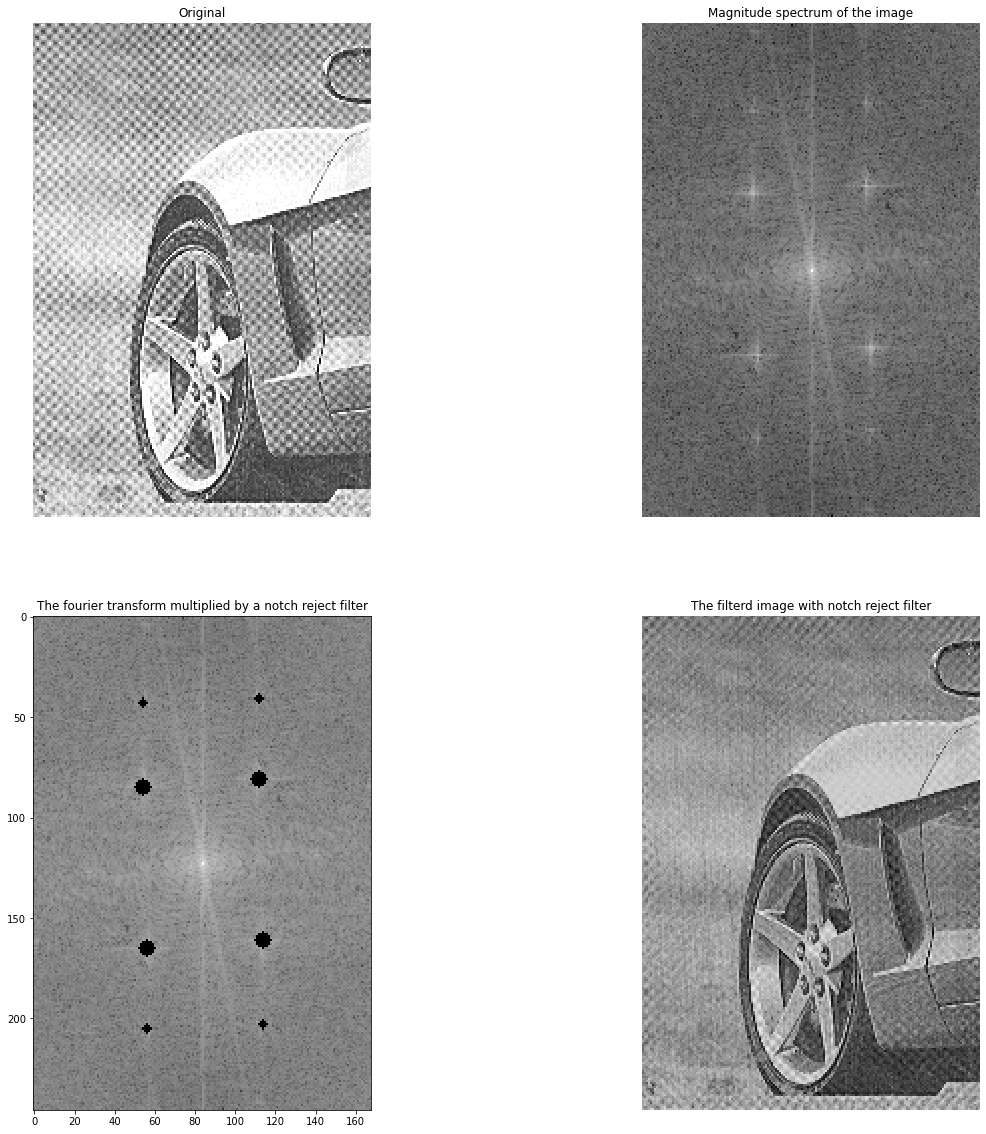

In [58]:
I3 = np.asarray(imageio.imread('car-moire-pattern.tif'))

If = np.fft.fft2(I3)
If = np.fft.fftshift(If)
phase = np.angle(If)
magnitude = np.log(np.abs(If))

M=I3.shape[0]
N=I3.shape[1]

H1 = gauss_lowpass2(M,N, 4, 38, 30)
H2 = gauss_lowpass2(M,N, 4, -42, 28)
H3 = gauss_lowpass2(M,N, 2, 80, 30)
H4 = gauss_lowpass2(M,N, 2, -82, 28)

filter = H1*H2*H3*H4
G = np.multiply(If,filter)
G = np.fft.ifftshift(G)
g = np.fft.ifft2(G)  


plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.imshow(I3, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(magnitude, cmap='gray')
plt.title('Magnitude spectrum of the image')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(np.multiply(magnitude, filter), "gray") 
plt.title("The fourier transform multiplied by a notch reject filter")
#plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(np.abs(g), "gray") 
plt.title("The filterd image with notch reject filter")
plt.axis('off')


(-0.5, 167.5, 245.5, -0.5)

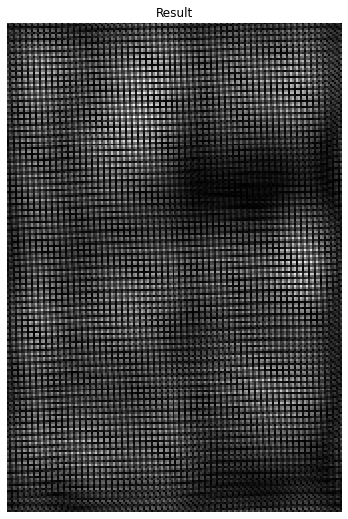

In [48]:
G1 = np.multiply(If,1-filter)
G2 = np.fft.ifftshift(G1)
g2 = np.fft.ifft2(G2)
plt.figure(figsize=(12,9))
plt.imshow(np.abs(g2), "gray") 
plt.title("The filterd image with notch pass filter")
plt.axis('off')

In [38]:
h=np.fft.ifft2(filter)
hi=np.imag(h)
np.where(hi==np.max(hi))

(array([184], dtype=int64), array([0], dtype=int64))

In [57]:
print(I3.shape)

(246, 168)


The original image has some interference pattern and with the usage of notch reject filter, the filtered image has enhanced. In the filtered image with the notch reject filter, the residual interference structure is rarely seen but the filter has tried to remove this undesirable pattern and provide a more clear image. The obtained image with the notch pass filter is the spatial interference pattern. So, this selective filter has tried to find the interference pattern in the frequency domain and omit this pattern to retrieve the original image.
The size of the origianl image is (246, 168) and the center of matrix with this size is (123,84). We should define the number of the notch reject filter with the center at the bright dots (except the center dot) of the image spectrum to remove moiré patterns. These bright dots are reperesentive of the moiré patterns in frequency domain. Here, we need to define the 4 filters, becuase the filter is symmetric and at end we have 8 notchs as it is shown in the third image, "The fourier transform multiplied by a notch reject filter". For determining these centers, we consider the center of the spectrum as a origin and then find the location of four bright dots in the right side. All of the four dot are relatively in the same vertical axis which is located on the 115 if grding the image. so we have 115-84=30 and two of these notches are on the bottom and the two others on the obove of the origin. Totally, with grding the image, we found the location of each notch and sbstract the location of center point (123,84) to find the values of uk and vk, the center of notch filter. Then, with trial and error, we have tried to place the notch exactly on the bright dots. Here, the size of the filter is the same as the size of image, so it does not need any padding.